## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  20.523938  1034.368812  0.756951  10.533337  783.232311
1  52.693341   435.802482  0.379845  10.237142  173.618616
2   6.929850  1128.404079  0.697303   8.734238  786.844597
3  67.856922   924.471244  0.772850   4.769166  717.575022
4  74.847770  1009.997708  0.806671   9.234032  818.279608


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9539863	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9426966	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9335519	total: 59ms	remaining: 19.6s
3:	learn: 0.9234170	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9101234	total: 59.9ms	remaining: 11.9s
5:	learn: 0.8989650	total: 60.6ms	remaining: 10s
6:	learn: 0.8876744	total: 60.9ms	remaining: 8.64s
7:	learn: 0.8767142	total: 61.4ms	remaining: 7.62s
8:	learn: 0.8652747	total: 61.8ms	remaining: 6.81s
9:	learn: 0.8556831	total: 62.4ms	remaining: 6.17s
10:	learn: 0.8473403	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8344578	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8228198	total: 64ms	remaining: 4.86s
13:	learn: 0.8112794	total: 64.4ms	remaining: 4.54s
14:	learn: 0.8010303	total: 64.9ms	remaining: 4.26s
15:	learn: 0.7919617	total: 65.3ms	remaining: 4.02s
16:	learn: 0.7825940	total: 65.7ms	remaining: 3.8s
17:	learn: 0.7735989	total: 66.4ms	remaining: 3.62s
18:	learn: 0.7671792	total: 66.8ms	remaining: 3.45s

134:	learn: 0.2101158	total: 118ms	remaining: 753ms
135:	learn: 0.2079515	total: 118ms	remaining: 750ms
136:	learn: 0.2058209	total: 118ms	remaining: 746ms
137:	learn: 0.2037265	total: 119ms	remaining: 743ms
138:	learn: 0.2017547	total: 119ms	remaining: 739ms
139:	learn: 0.1997723	total: 120ms	remaining: 735ms
140:	learn: 0.1977191	total: 120ms	remaining: 732ms
141:	learn: 0.1960469	total: 120ms	remaining: 728ms
142:	learn: 0.1939390	total: 121ms	remaining: 724ms
143:	learn: 0.1918974	total: 121ms	remaining: 721ms
144:	learn: 0.1897863	total: 122ms	remaining: 717ms
145:	learn: 0.1874953	total: 122ms	remaining: 714ms
146:	learn: 0.1850362	total: 122ms	remaining: 710ms
147:	learn: 0.1831450	total: 123ms	remaining: 708ms
148:	learn: 0.1809336	total: 123ms	remaining: 705ms
149:	learn: 0.1790042	total: 124ms	remaining: 702ms
150:	learn: 0.1776555	total: 124ms	remaining: 698ms
151:	learn: 0.1756969	total: 125ms	remaining: 695ms
152:	learn: 0.1738166	total: 125ms	remaining: 692ms
153:	learn: 

288:	learn: 0.0516476	total: 186ms	remaining: 457ms
289:	learn: 0.0513091	total: 186ms	remaining: 456ms
290:	learn: 0.0509527	total: 187ms	remaining: 455ms
291:	learn: 0.0506103	total: 187ms	remaining: 453ms
292:	learn: 0.0501238	total: 187ms	remaining: 452ms
293:	learn: 0.0497171	total: 188ms	remaining: 451ms
294:	learn: 0.0493647	total: 188ms	remaining: 450ms
295:	learn: 0.0489318	total: 189ms	remaining: 449ms
296:	learn: 0.0485514	total: 189ms	remaining: 448ms
297:	learn: 0.0482383	total: 189ms	remaining: 446ms
298:	learn: 0.0478963	total: 190ms	remaining: 445ms
299:	learn: 0.0475501	total: 190ms	remaining: 444ms
300:	learn: 0.0471171	total: 191ms	remaining: 443ms
301:	learn: 0.0467458	total: 191ms	remaining: 442ms
302:	learn: 0.0464437	total: 192ms	remaining: 441ms
303:	learn: 0.0461454	total: 192ms	remaining: 439ms
304:	learn: 0.0458226	total: 192ms	remaining: 438ms
305:	learn: 0.0455346	total: 193ms	remaining: 437ms
306:	learn: 0.0452405	total: 193ms	remaining: 436ms
307:	learn: 

546:	learn: 0.0155275	total: 299ms	remaining: 247ms
547:	learn: 0.0155170	total: 299ms	remaining: 247ms
548:	learn: 0.0155066	total: 300ms	remaining: 246ms
549:	learn: 0.0154196	total: 300ms	remaining: 245ms
550:	learn: 0.0154094	total: 300ms	remaining: 245ms
551:	learn: 0.0153993	total: 301ms	remaining: 244ms
552:	learn: 0.0153894	total: 301ms	remaining: 244ms
553:	learn: 0.0153041	total: 302ms	remaining: 243ms
554:	learn: 0.0152345	total: 302ms	remaining: 242ms
555:	learn: 0.0152248	total: 302ms	remaining: 242ms
556:	learn: 0.0152152	total: 303ms	remaining: 241ms
557:	learn: 0.0151324	total: 304ms	remaining: 240ms
558:	learn: 0.0151230	total: 304ms	remaining: 240ms
559:	learn: 0.0151143	total: 304ms	remaining: 239ms
560:	learn: 0.0151058	total: 305ms	remaining: 238ms
561:	learn: 0.0150245	total: 305ms	remaining: 238ms
562:	learn: 0.0150160	total: 306ms	remaining: 237ms
563:	learn: 0.0150077	total: 306ms	remaining: 237ms
564:	learn: 0.0149995	total: 307ms	remaining: 236ms
565:	learn: 

712:	learn: 0.0092708	total: 367ms	remaining: 148ms
713:	learn: 0.0092530	total: 367ms	remaining: 147ms
714:	learn: 0.0092014	total: 368ms	remaining: 147ms
715:	learn: 0.0091705	total: 368ms	remaining: 146ms
716:	learn: 0.0091486	total: 369ms	remaining: 146ms
717:	learn: 0.0091283	total: 369ms	remaining: 145ms
718:	learn: 0.0090961	total: 370ms	remaining: 145ms
719:	learn: 0.0090747	total: 370ms	remaining: 144ms
720:	learn: 0.0090547	total: 371ms	remaining: 144ms
721:	learn: 0.0090336	total: 371ms	remaining: 143ms
722:	learn: 0.0090140	total: 372ms	remaining: 142ms
723:	learn: 0.0089754	total: 372ms	remaining: 142ms
724:	learn: 0.0089586	total: 372ms	remaining: 141ms
725:	learn: 0.0089379	total: 373ms	remaining: 141ms
726:	learn: 0.0088999	total: 373ms	remaining: 140ms
727:	learn: 0.0088799	total: 373ms	remaining: 140ms
728:	learn: 0.0088536	total: 374ms	remaining: 139ms
729:	learn: 0.0088336	total: 374ms	remaining: 138ms
730:	learn: 0.0088040	total: 375ms	remaining: 138ms
731:	learn: 

969:	learn: 0.0045095	total: 480ms	remaining: 14.9ms
970:	learn: 0.0044861	total: 481ms	remaining: 14.4ms
971:	learn: 0.0044632	total: 481ms	remaining: 13.9ms
972:	learn: 0.0044521	total: 482ms	remaining: 13.4ms
973:	learn: 0.0044435	total: 482ms	remaining: 12.9ms
974:	learn: 0.0044307	total: 482ms	remaining: 12.4ms
975:	learn: 0.0044241	total: 483ms	remaining: 11.9ms
976:	learn: 0.0044177	total: 483ms	remaining: 11.4ms
977:	learn: 0.0043995	total: 484ms	remaining: 10.9ms
978:	learn: 0.0043805	total: 484ms	remaining: 10.4ms
979:	learn: 0.0043722	total: 484ms	remaining: 9.89ms
980:	learn: 0.0043576	total: 485ms	remaining: 9.39ms
981:	learn: 0.0043356	total: 485ms	remaining: 8.89ms
982:	learn: 0.0043274	total: 485ms	remaining: 8.39ms
983:	learn: 0.0043132	total: 486ms	remaining: 7.9ms
984:	learn: 0.0043069	total: 486ms	remaining: 7.4ms
985:	learn: 0.0042955	total: 487ms	remaining: 6.91ms
986:	learn: 0.0042875	total: 487ms	remaining: 6.41ms
987:	learn: 0.0042691	total: 487ms	remaining: 5.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


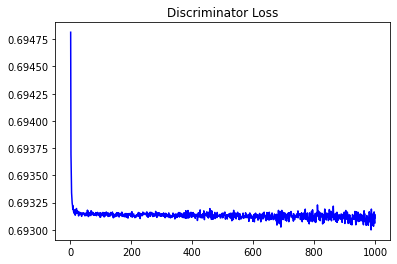

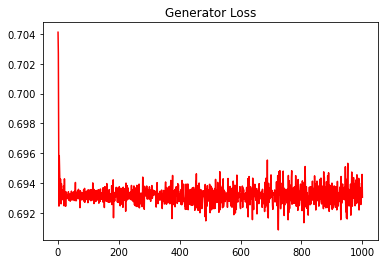

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0350708684453998


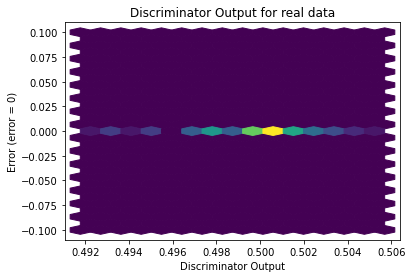

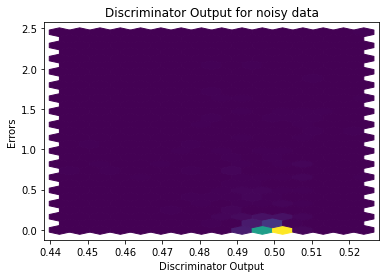

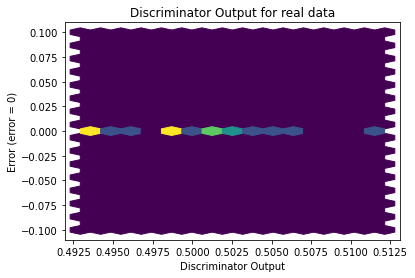

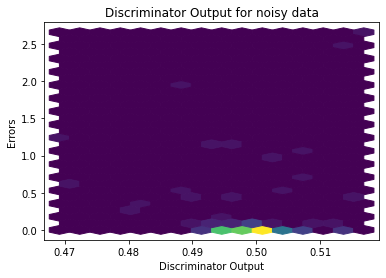

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
